In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import itertools
import statsmodels.api as sm

In [2]:
pjmw= pd.read_excel("/content/PJMW_MW_Hourly (2).xlsx", header=0, index_col=0, parse_dates=True)

In [3]:
pjmw.shape

(143206, 1)

In [4]:
pjmw.head()

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077
2002-12-31 02:00:00,4939
2002-12-31 03:00:00,4885
2002-12-31 04:00:00,4857
2002-12-31 05:00:00,4930


In [5]:
pjmw.describe()

,PJMW_MW
count,143206.000000
mean,5602.375089
std,979.142872
min,487.000000
25%,4907.000000
50%,5530.000000
75%,6252.000000
max,9594.000000


In [6]:
pjmw.dtypes

PJMW_MW    int64
dtype: object

In [7]:
pjmw = pjmw.sort_index()

In [8]:
pjmw.head()

,PJMW_MW
Datetime,
2002-04-01 01:00:00,4374
2002-04-01 02:00:00,4306
2002-04-01 03:00:00,4322
2002-04-01 04:00:00,4359
2002-04-01 05:00:00,4436


In [9]:
pjmw[pjmw.index.duplicated()]

,PJMW_MW
Datetime,
2014-11-02 02:00:00,4613
2015-11-01 02:00:00,3832
2016-11-06 02:00:00,4089
2017-11-05 02:00:00,4042


In [10]:
unique, counts = np.unique(pjmw.index.duplicated(), return_counts=True)

In [11]:
dict(zip(unique, counts))

{False: 143202, True: 4}

In [12]:
pjmw['2015-10-02'].head()

<ipython-input-12-8281b906badd>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pjmw['2015-10-02'].head()


,PJMW_MW
Datetime,
2015-10-02 00:00:00,4378
2015-10-02 01:00:00,4137
2015-10-02 02:00:00,3960
2015-10-02 03:00:00,3899
2015-10-02 04:00:00,3853


In [13]:
pjmw=pjmw.groupby(level=0).mean()

In [14]:
pjmw['2015-10-02'].head()

<ipython-input-14-8281b906badd>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pjmw['2015-10-02'].head()


,PJMW_MW
Datetime,
2015-10-02 00:00:00,4378.0
2015-10-02 01:00:00,4137.0
2015-10-02 02:00:00,3960.0
2015-10-02 03:00:00,3899.0
2015-10-02 04:00:00,3853.0


In [15]:
pd.date_range(pjmw.index.min(), pjmw.index.max(), freq="a").difference(pjmw.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [16]:
pd.date_range(pjmw.index.min(), pjmw.index.max(), freq="b").difference(pjmw.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [17]:
pd.date_range(pjmw.index.min(), pjmw.index.max(), freq="c").difference(pjmw.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [18]:
pd.date_range(pjmw.index.min(), pjmw.index.max(), freq="H").difference(pjmw.index)

DatetimeIndex(['2002-04-07 03:00:00', '2002-10-27 02:00:00',
               '2003-04-06 03:00:00', '2003-10-26 02:00:00',
               '2004-04-04 03:00:00', '2004-10-31 02:00:00',
               '2005-04-03 03:00:00', '2005-10-30 02:00:00',
               '2006-04-02 03:00:00', '2006-10-29 02:00:00',
               '2007-03-11 03:00:00', '2007-11-04 02:00:00',
               '2008-03-09 03:00:00', '2008-11-02 02:00:00',
               '2009-03-08 03:00:00', '2009-11-01 02:00:00',
               '2010-03-14 03:00:00', '2010-11-07 02:00:00',
               '2010-12-10 00:00:00', '2011-03-13 03:00:00',
               '2011-11-06 02:00:00', '2012-03-11 03:00:00',
               '2012-11-04 02:00:00', '2013-03-10 03:00:00',
               '2013-11-03 02:00:00', '2014-03-09 03:00:00',
               '2015-03-08 03:00:00', '2016-03-13 03:00:00',
               '2017-03-12 03:00:00', '2018-03-11 03:00:00'],
              dtype='datetime64[ns]', freq=None)

In [19]:
pjmw['2002-10-27'].head()

<ipython-input-19-f60177b9c375>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pjmw['2002-10-27'].head()


,PJMW_MW
Datetime,
2002-10-27 00:00:00,4583.0
2002-10-27 01:00:00,4304.0
2002-10-27 03:00:00,4014.0
2002-10-27 04:00:00,4156.0
2002-10-27 05:00:00,4179.0


In [20]:
n_date_range = pd.date_range(pjmw.index.min(), pjmw.index.max(), freq="H")
df=pjmw.reindex(n_date_range)
df.head(10)

,PJMW_MW
2002-04-01 01:00:00,4374.0
2002-04-01 02:00:00,4306.0
2002-04-01 03:00:00,4322.0
2002-04-01 04:00:00,4359.0
2002-04-01 05:00:00,4436.0
2002-04-01 06:00:00,4723.0
2002-04-01 07:00:00,5180.0
2002-04-01 08:00:00,5482.0
2002-04-01 09:00:00,5616.0
2002-04-01 10:00:00,5722.0


In [21]:
pjmw['PJMW_MW']=pjmw.PJMW_MW.interpolate(method='linear')
pjmw.head(10)

,PJMW_MW
Datetime,
2002-04-01 01:00:00,4374.0
2002-04-01 02:00:00,4306.0
2002-04-01 03:00:00,4322.0
2002-04-01 04:00:00,4359.0
2002-04-01 05:00:00,4436.0
2002-04-01 06:00:00,4723.0
2002-04-01 07:00:00,5180.0
2002-04-01 08:00:00,5482.0
2002-04-01 09:00:00,5616.0


<Axes: xlabel='Datetime'>

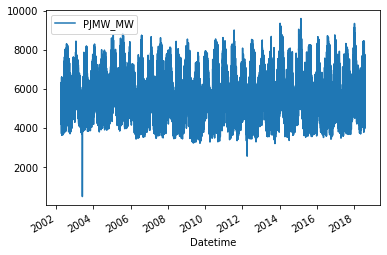

In [22]:
pjmw.plot()

array([[<Axes: title={'center': 'PJMW_MW'}>]], dtype=object)

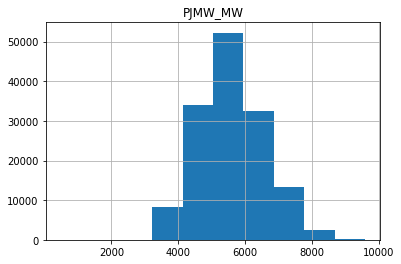

In [23]:
pjmw.hist()

<Axes: xlabel='Datetime'>

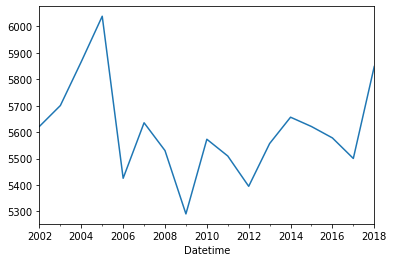

In [24]:
pjmw.PJMW_MW.resample(rule='A').mean().plot()

<Axes: xlabel='Datetime'>

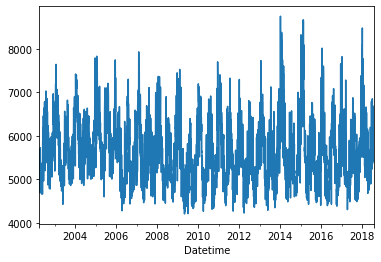

In [25]:
pjmw.PJMW_MW.resample(rule='B').mean().plot()

<Axes: xlabel='Datetime'>

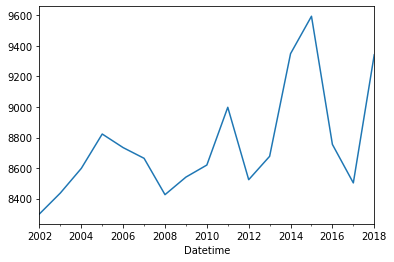

In [26]:
pjmw.PJMW_MW.resample(rule='A').max().plot()

<Axes: xlabel='Datetime'>

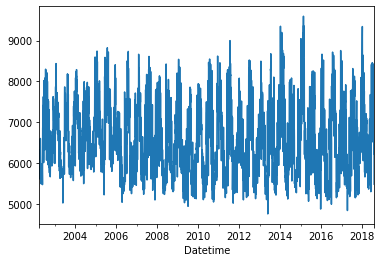

In [27]:
pjmw.PJMW_MW.resample(rule='B').max().plot()

<Axes: xlabel='Datetime'>

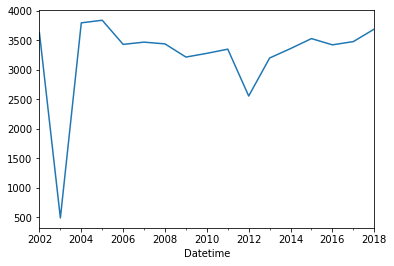

In [28]:
pjmw.PJMW_MW.resample(rule='A').min().plot()

<Axes: xlabel='Datetime'>

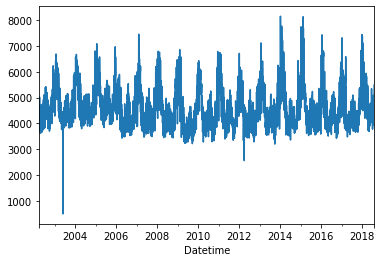

In [29]:
pjmw.PJMW_MW.resample(rule='B').min().plot()

In [30]:
pjmw['2003'].PJMW_MW.resample(rule='A').min()

<ipython-input-30-ae48d7fa569c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pjmw['2003'].PJMW_MW.resample(rule='A').min()


Datetime
2003-12-31    487.0
Freq: A-DEC, Name: PJMW_MW, dtype: float64

In [31]:
pjmw[pjmw['PJMW_MW']==487.0]

,PJMW_MW
Datetime,
2003-05-29,487.0


In [32]:
pjmw['2003-05-29'].head()

<ipython-input-32-ba09d1e161a0>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pjmw['2003-05-29'].head()


,PJMW_MW
Datetime,
2003-05-29 00:00:00,487.0
2003-05-29 01:00:00,4560.0
2003-05-29 02:00:00,4424.0
2003-05-29 03:00:00,4351.0
2003-05-29 04:00:00,4337.0


In [33]:
pjmw['PJMW_MW'].mask(pjmw['PJMW_MW']<3000,inplace=True)

In [34]:
pjmw['PJMW_MW']=pjmw.PJMW_MW.interpolate(method='linear')

In [35]:
pjmw['2003-05-29'].head()

<ipython-input-35-ba09d1e161a0>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pjmw['2003-05-29'].head()


,PJMW_MW
Datetime,
2003-05-29 00:00:00,4938.5
2003-05-29 01:00:00,4560.0
2003-05-29 02:00:00,4424.0
2003-05-29 03:00:00,4351.0
2003-05-29 04:00:00,4337.0


<Axes: xlabel='Datetime'>

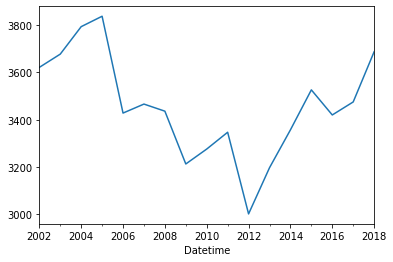

In [36]:
pjmw.PJMW_MW.resample(rule='A').min().plot()

In [37]:
pjmw[pjmw['PJMW_MW']==3002.0]

,PJMW_MW
Datetime,
2012-04-01 01:00:00,3002.0


In [38]:
pjmw['2012-04-01'].head()

<ipython-input-38-d5ac3f791515>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  pjmw['2012-04-01'].head()


,PJMW_MW
Datetime,
2012-04-01 00:00:00,4537.0
2012-04-01 01:00:00,3002.0
2012-04-01 02:00:00,3029.0
2012-04-01 03:00:00,3056.0
2012-04-01 04:00:00,3083.0


In [39]:
pjmw.to_csv('dataset.csv')

In [40]:
type(pjmw)

pandas.core.frame.DataFrame

In [41]:
pjmw1=pjmw.copy()

Text(0.5, 1.0, 'Energy consumption')

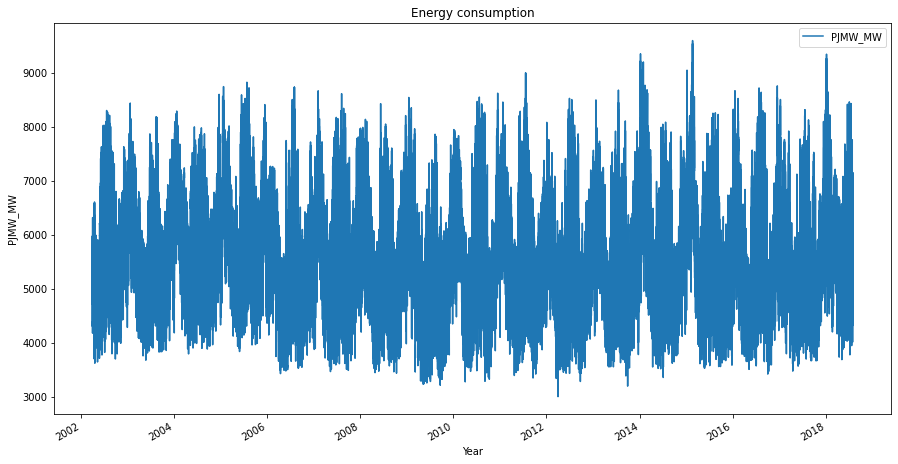

In [42]:
plt.rcParams["figure.figsize"]= (15,8)
pjmw1.plot()
plt.xlabel('Year') 
plt.ylabel('PJMW_MW') 

plt.title("Energy consumption")

In [43]:
pjmw1

,PJMW_MW
Datetime,
2002-04-01 01:00:00,4374.0
2002-04-01 02:00:00,4306.0
2002-04-01 03:00:00,4322.0
2002-04-01 04:00:00,4359.0
2002-04-01 05:00:00,4436.0
...,...
2018-08-02 20:00:00,6545.0
2018-08-02 21:00:00,6496.0
2018-08-02 22:00:00,6325.0


In [44]:
pjmw1["Date"] = pd.to_datetime(pjmw1.index,format='%Y-%m-%d %H:%M')
pjmw1["month"] = pjmw1.Date.dt.strftime("%m") # month extraction
pjmw1["year"] = pjmw1.Date.dt.strftime("%Y") # year extraction
pjmw1["day"] = pjmw1.Date.dt.strftime("%d") # day extraction
pjmw1["Hour"] = pjmw1.Date.dt.strftime("%H") # Hour extraction

In [45]:
pjmw1

,PJMW_MW,Date,month,year,day,Hour
Datetime,,,,,,
2002-04-01 01:00:00,4374.0,2002-04-01 01:00:00,04,2002,01,01
2002-04-01 02:00:00,4306.0,2002-04-01 02:00:00,04,2002,01,02
2002-04-01 03:00:00,4322.0,2002-04-01 03:00:00,04,2002,01,03
2002-04-01 04:00:00,4359.0,2002-04-01 04:00:00,04,2002,01,04
2002-04-01 05:00:00,4436.0,2002-04-01 05:00:00,04,2002,01,05
...,...,...,...,...,...,...
2018-08-02 20:00:00,6545.0,2018-08-02 20:00:00,08,2018,02,20
2018-08-02 21:00:00,6496.0,2018-08-02 21:00:00,08,2018,02,21
2018-08-02 22:00:00,6325.0,2018-08-02 22:00:00,08,2018,02,22


In [46]:
pjmw1.drop('Date', axis=1,inplace=True)

In [47]:
pjmw1['weekday'] = pd.to_datetime(pjmw1.index).day_name()

In [48]:
pjmw1

,PJMW_MW,month,year,day,Hour,weekday
Datetime,,,,,,
2002-04-01 01:00:00,4374.0,04,2002,01,01,Monday
2002-04-01 02:00:00,4306.0,04,2002,01,02,Monday
2002-04-01 03:00:00,4322.0,04,2002,01,03,Monday
2002-04-01 04:00:00,4359.0,04,2002,01,04,Monday
2002-04-01 05:00:00,4436.0,04,2002,01,05,Monday
...,...,...,...,...,...,...
2018-08-02 20:00:00,6545.0,08,2018,02,20,Thursday
2018-08-02 21:00:00,6496.0,08,2018,02,21,Thursday
2018-08-02 22:00:00,6325.0,08,2018,02,22,Thursday


In [49]:
pjmw2=pjmw1.copy()

In [50]:
pjmw2

,PJMW_MW,month,year,day,Hour,weekday
Datetime,,,,,,
2002-04-01 01:00:00,4374.0,04,2002,01,01,Monday
2002-04-01 02:00:00,4306.0,04,2002,01,02,Monday
2002-04-01 03:00:00,4322.0,04,2002,01,03,Monday
2002-04-01 04:00:00,4359.0,04,2002,01,04,Monday
2002-04-01 05:00:00,4436.0,04,2002,01,05,Monday
...,...,...,...,...,...,...
2018-08-02 20:00:00,6545.0,08,2018,02,20,Thursday
2018-08-02 21:00:00,6496.0,08,2018,02,21,Thursday
2018-08-02 22:00:00,6325.0,08,2018,02,22,Thursday


<Axes: >

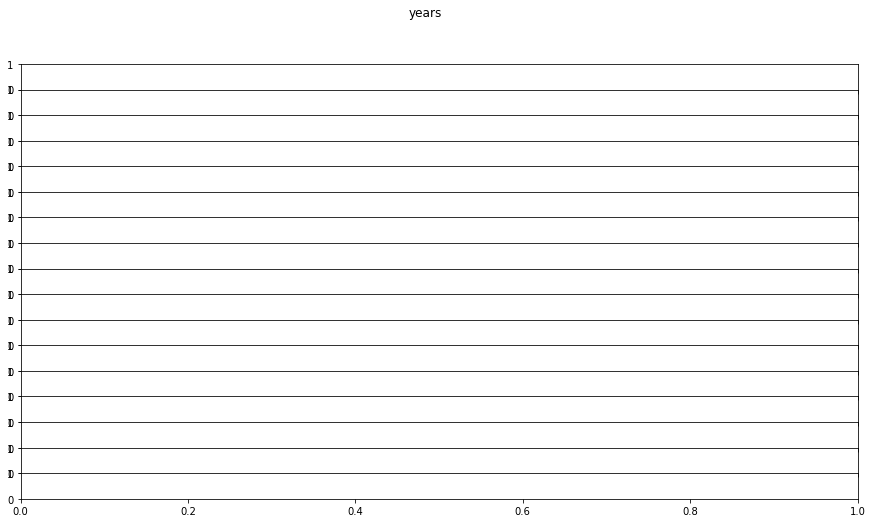

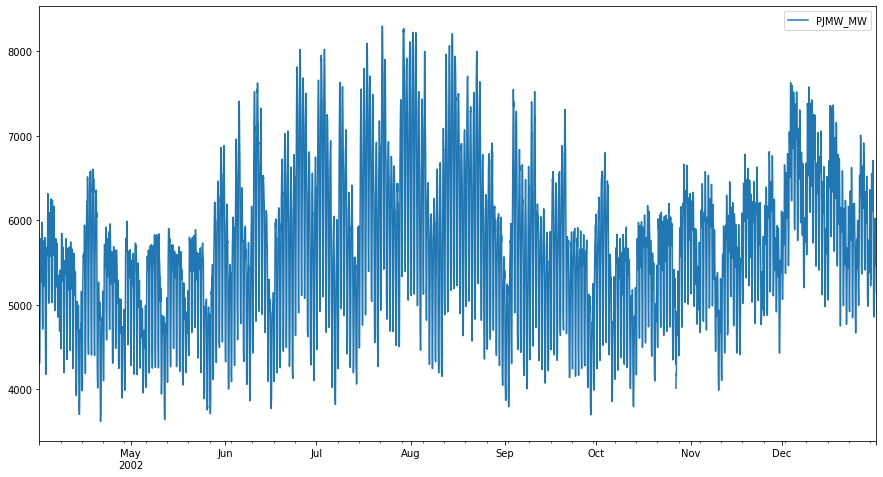

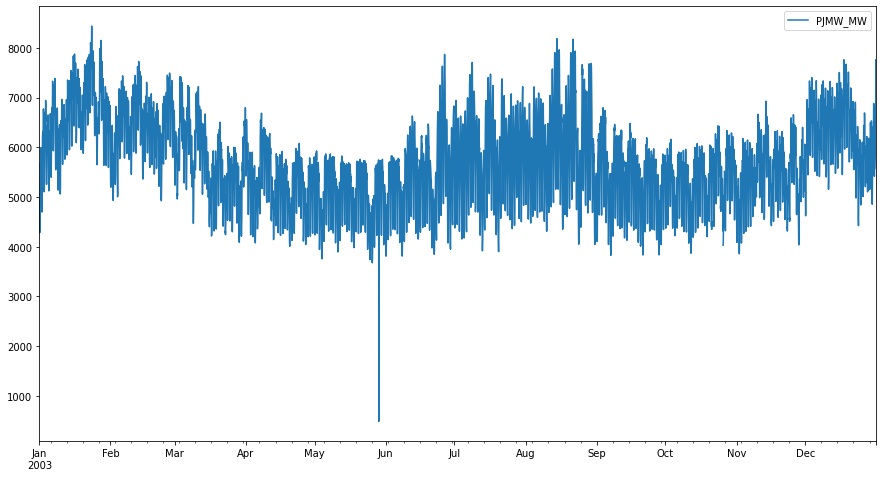

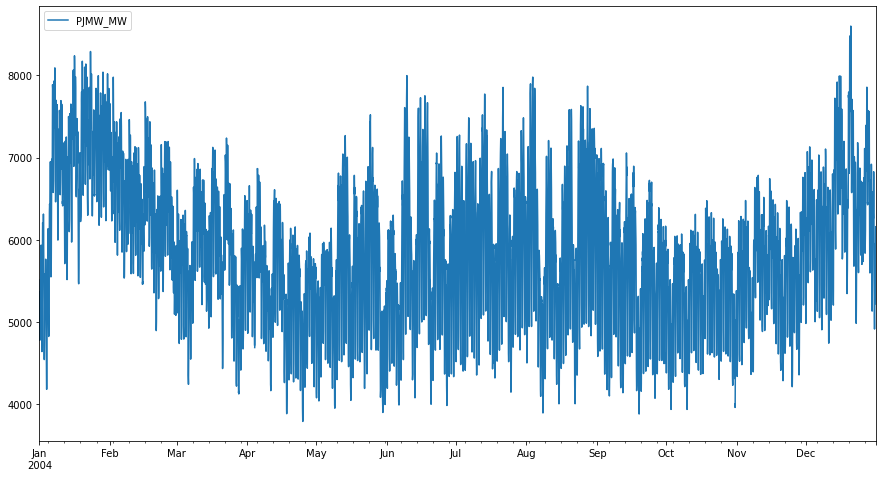

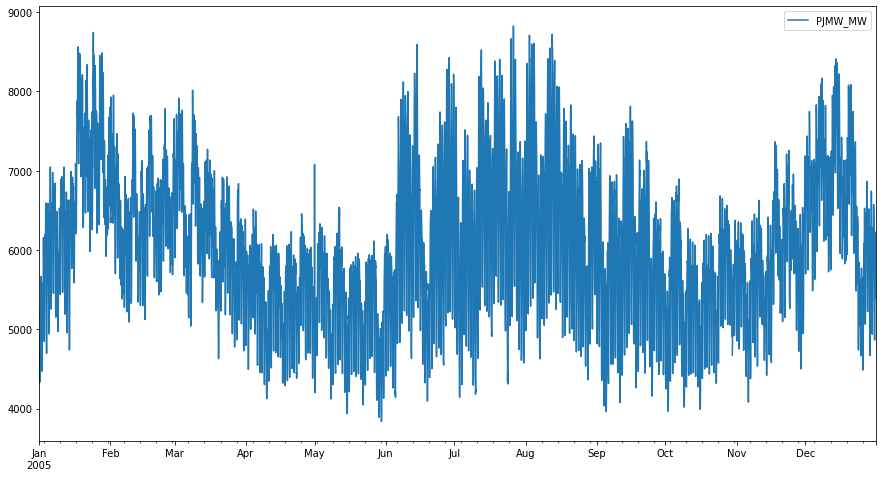

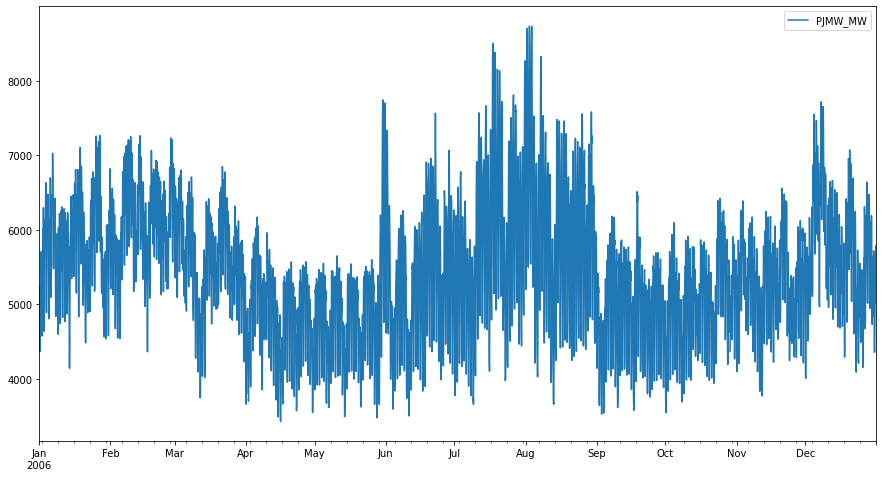

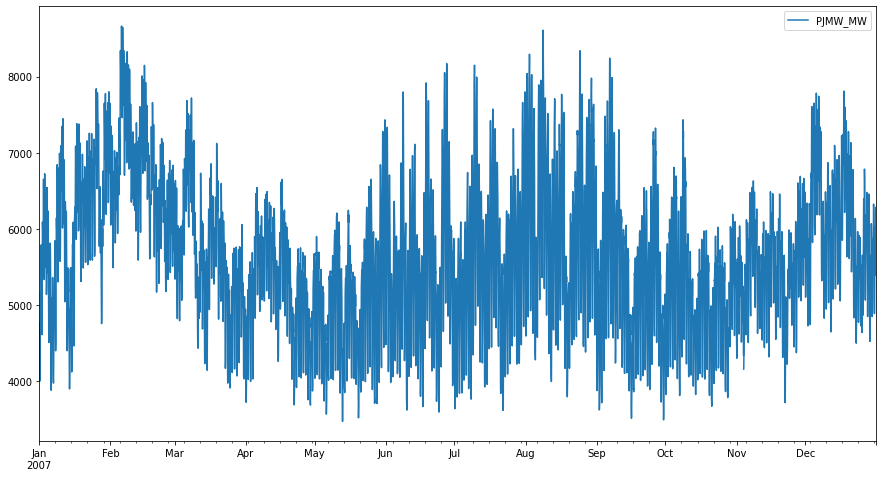

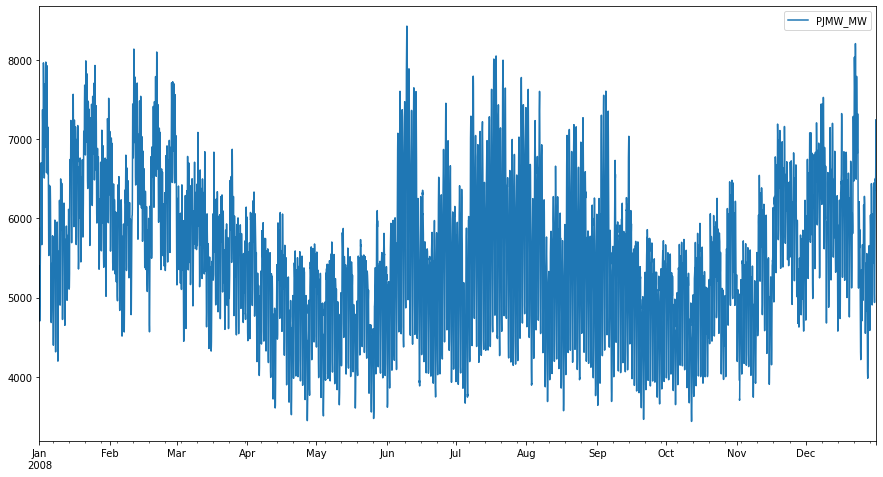

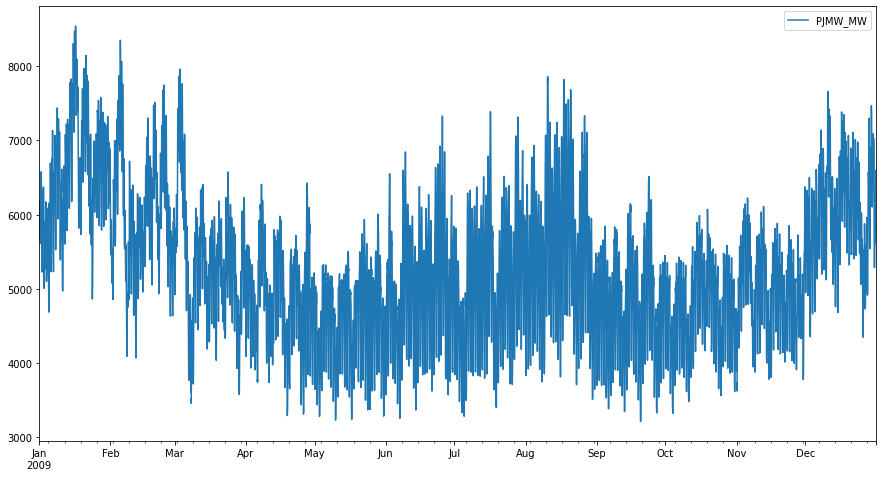

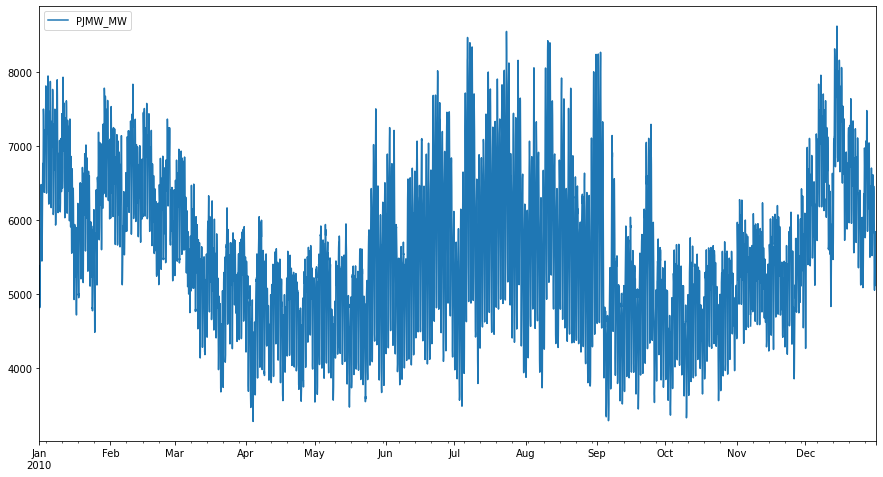

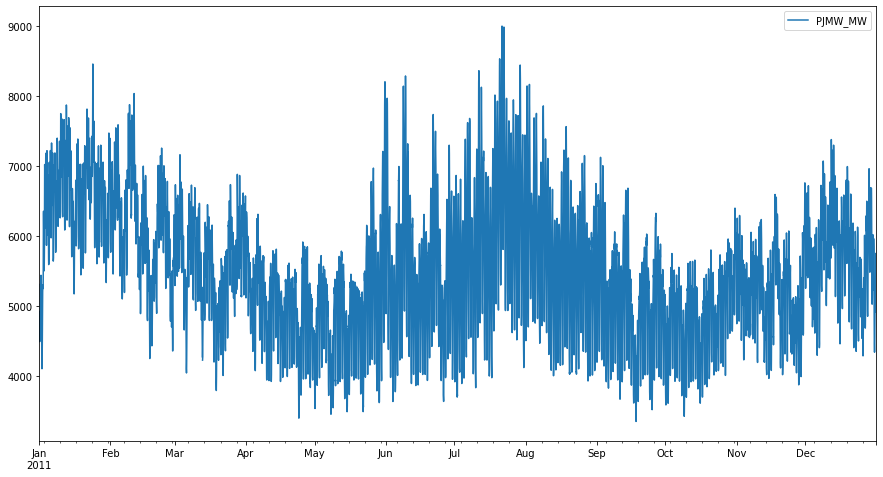

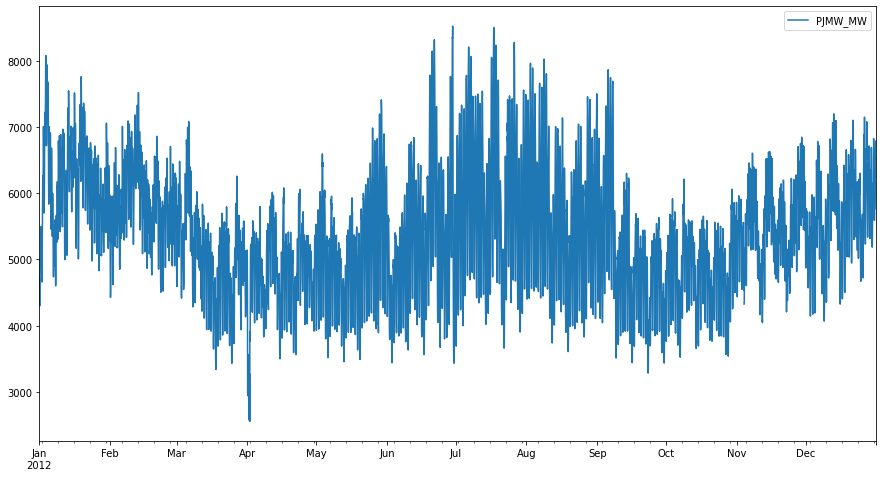

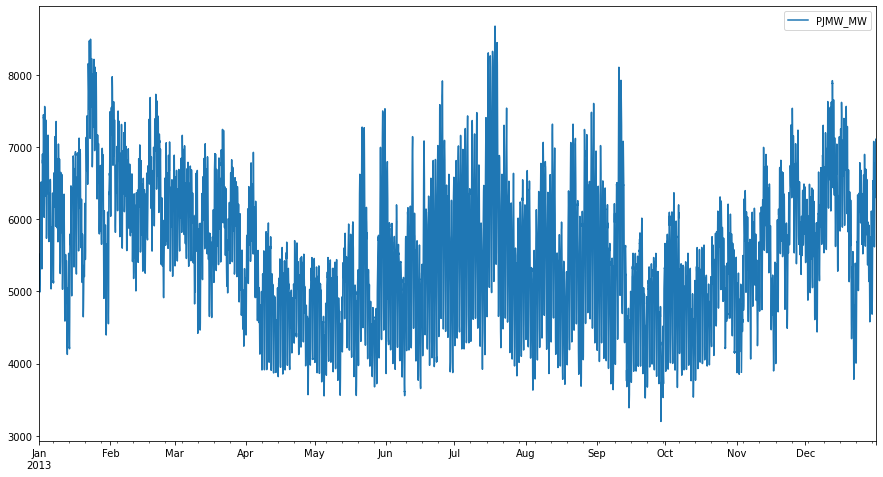

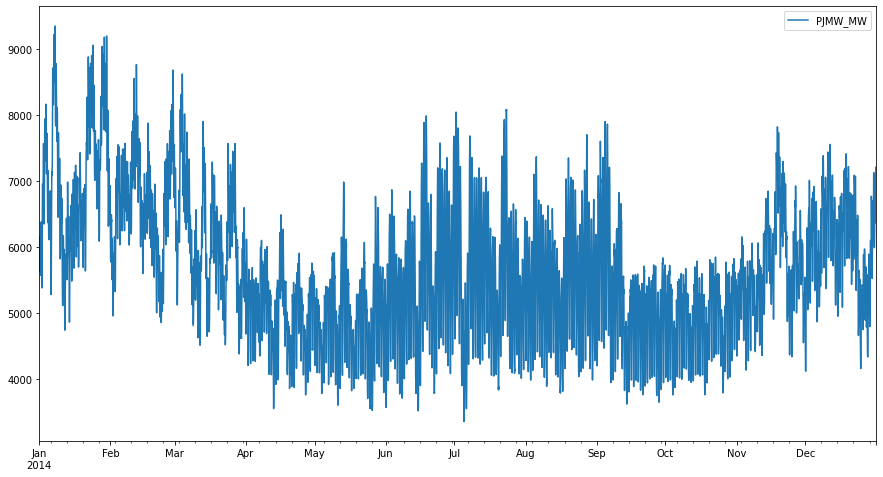

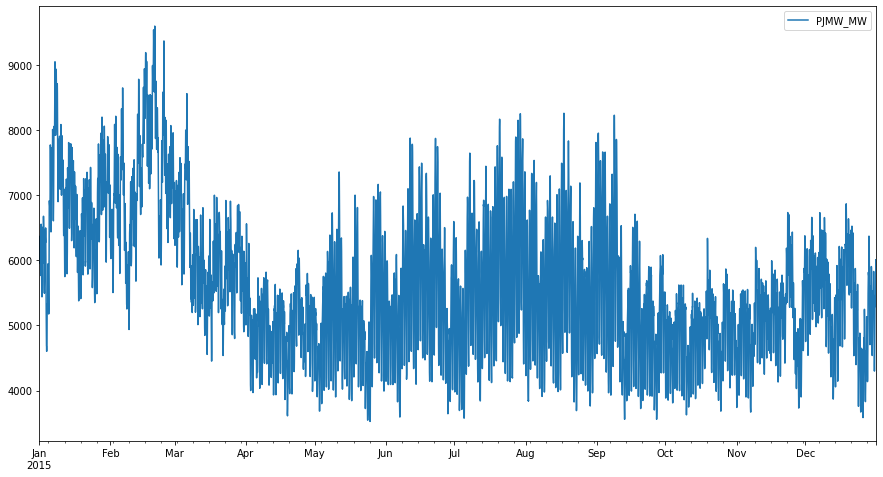

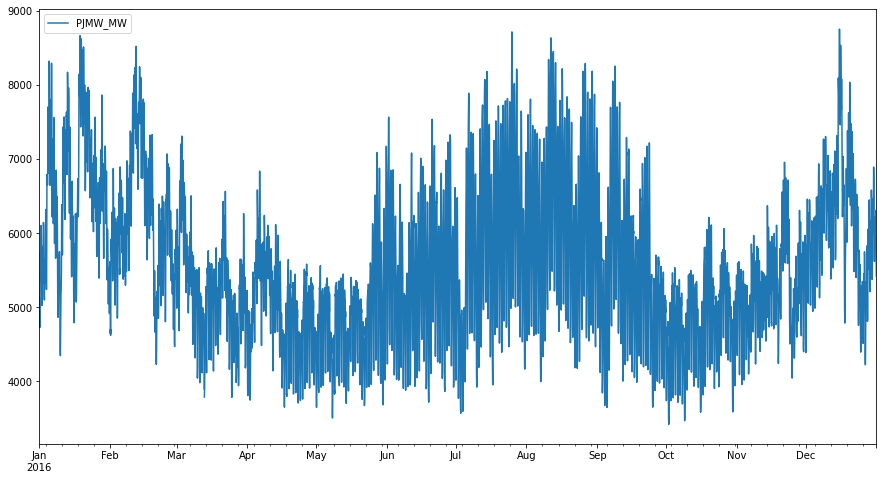

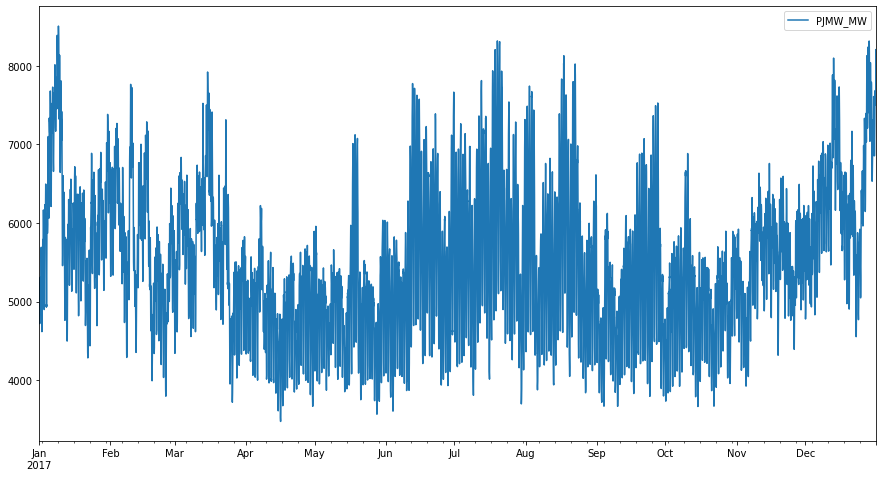

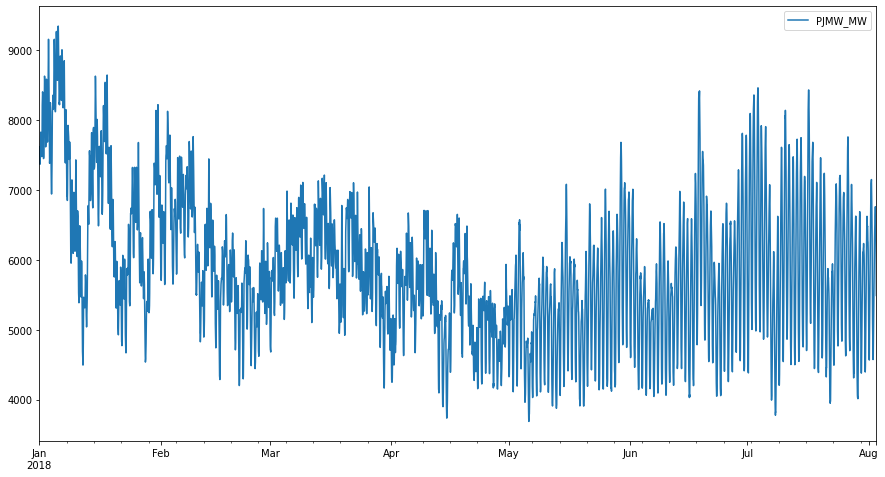

In [51]:
fig = plt.figure()
sb = fig.add_gridspec(17, hspace=0)
axs = sb.subplots(sharex=True, sharey=True)
fig.suptitle('years')
df.loc['2002'].plot()
df.loc['2003'].plot()
df.loc['2004'].plot()
df.loc['2005'].plot()
df.loc['2006'].plot()
df.loc['2007'].plot()
df.loc['2008'].plot()
df.loc['2009'].plot()
df.loc['2010'].plot()
df.loc['2011'].plot()
df.loc['2012'].plot()
df.loc['2013'].plot()
df.loc['2014'].plot()
df.loc['2015'].plot()
df.loc['2016'].plot()
df.loc['2017'].plot()
df.loc['2018'].plot()

In [52]:
pjmw2.describe()

,PJMW_MW
count,143202.000000
mean,5602.493684
std,978.908573
min,3002.000000
25%,4907.000000
50%,5530.000000
75%,6252.000000
max,9594.000000


Text(0.5, 1.0, 'Yearly Consumption')

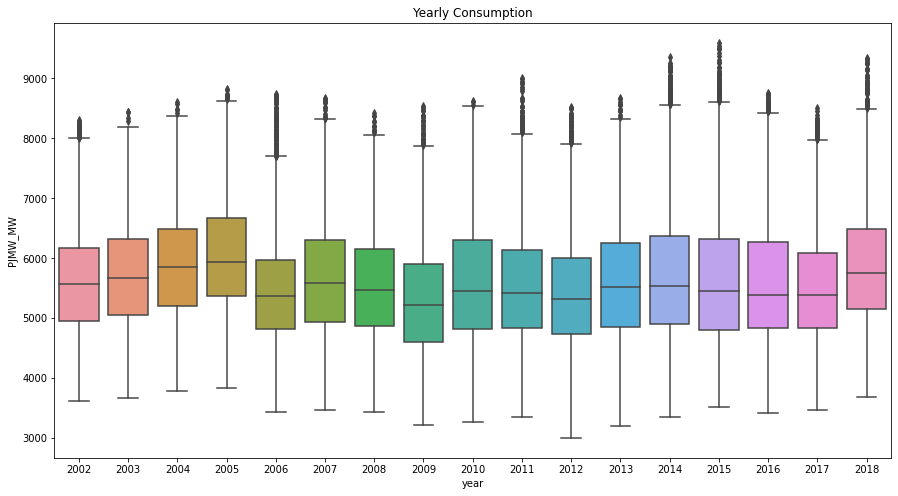

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x = pjmw2.year,y = pjmw2['PJMW_MW'], ax = ax)
ax.set_title('Yearly Consumption')

Text(0.5, 1.0, 'Monthly Consumption')

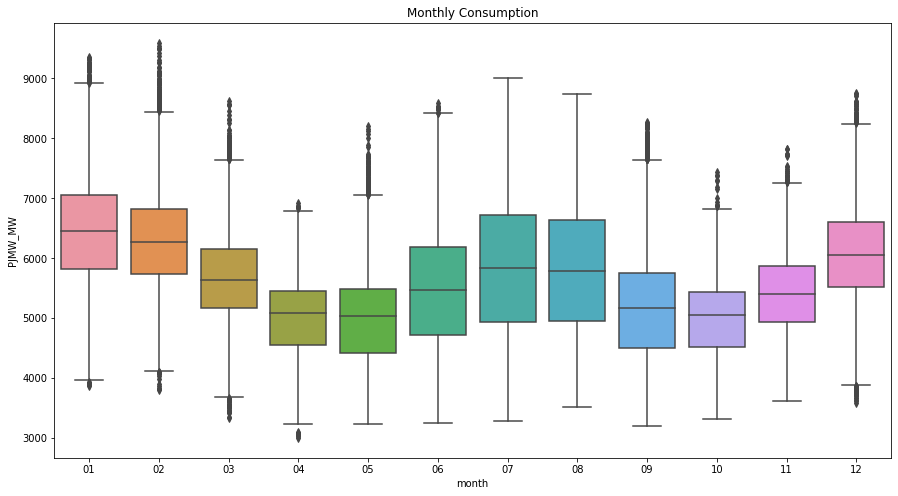

In [54]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x = pjmw2.month,y = pjmw2['PJMW_MW'], order=['01','02','03','04','05','06','07','08','09','10','11','12'],ax = ax)
ax.set_title('Monthly Consumption')

In [55]:
pjmw3=pjmw2.copy()

In [56]:
pjmw3['season']=pjmw3['month'].copy()

In [57]:
pjmw3['season']=pjmw3['season'].map({'01':'Winter','02':'Winter','03':'Winter','04':'Spring','05':'Spring','06':'Spring','07':'Summer','08':'Summer','09':'Summer','10': 'Fall','11': 'Fall','12': 'Fall'})

In [58]:
pjmw3.head()

,PJMW_MW,month,year,day,Hour,weekday,season
Datetime,,,,,,,
2002-04-01 01:00:00,4374.0,04,2002,01,01,Monday,Spring
2002-04-01 02:00:00,4306.0,04,2002,01,02,Monday,Spring
2002-04-01 03:00:00,4322.0,04,2002,01,03,Monday,Spring
2002-04-01 04:00:00,4359.0,04,2002,01,04,Monday,Spring
2002-04-01 05:00:00,4436.0,04,2002,01,05,Monday,Spring


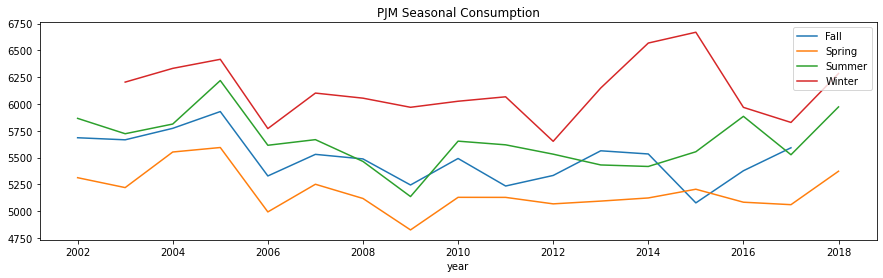

In [59]:
pjmw3.pivot_table(index=pjmw3['year'], columns='season', values='PJMW_MW',aggfunc='mean').plot(figsize=(15,4),title='PJM Seasonal Consumption')
plt.legend(loc='upper right')

<Axes: xlabel='year', ylabel='PJMW_MW'>

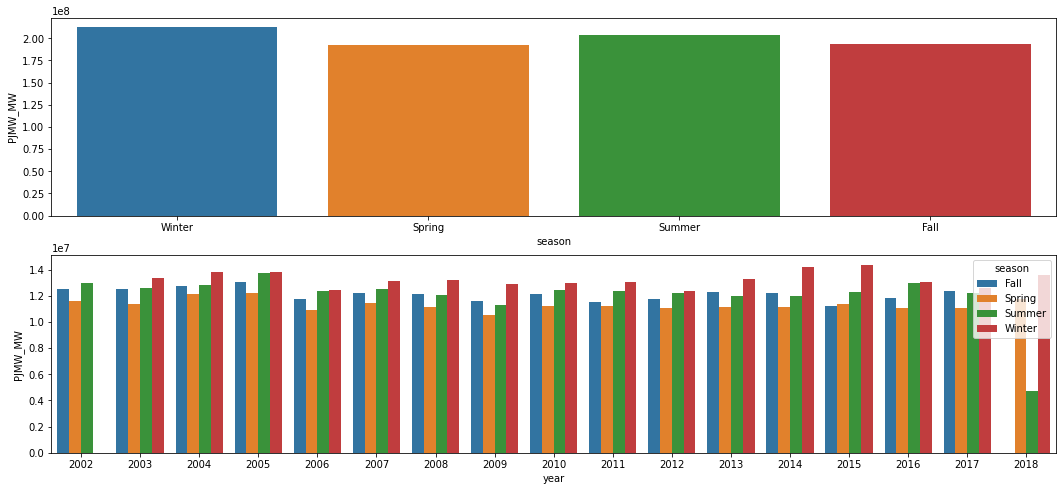

In [60]:
plt.figure(figsize=(18,8))
ax1 = pjmw3[['season', 'PJMW_MW']].groupby( 'season' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='season', y='PJMW_MW', data=ax1, order=['Winter', 'Spring', 'Summer', 'Fall'] )

ax2 = pjmw3[['year', 'season', 'PJMW_MW']].groupby( ['year', 'season'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='PJMW_MW', hue='season', data=ax2 )

<Axes: xlabel='month', ylabel='year'>

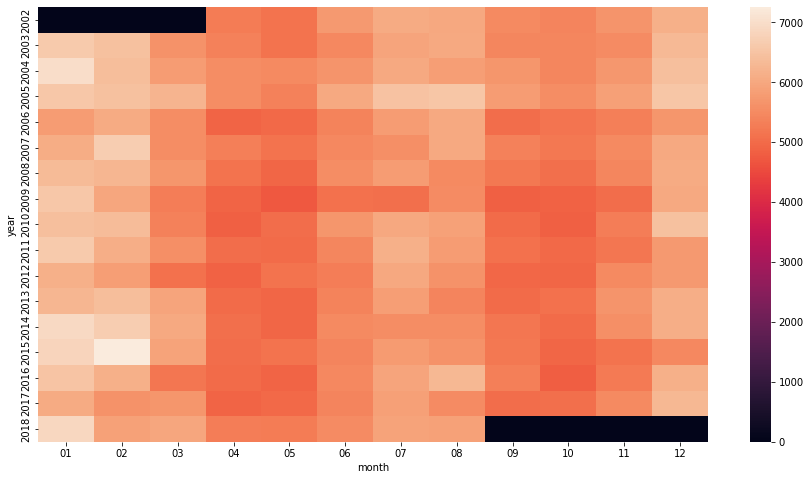

In [61]:
plt.figure(figsize=(15,8))
heatmap = pd.pivot_table(data=pjmw2,values="PJMW_MW",index="year",columns="month",aggfunc="median",fill_value=0)
sns.heatmap(heatmap ,fmt="h")

Text(0.5, 1.0, 'Daily Consumption - Hour Basis')

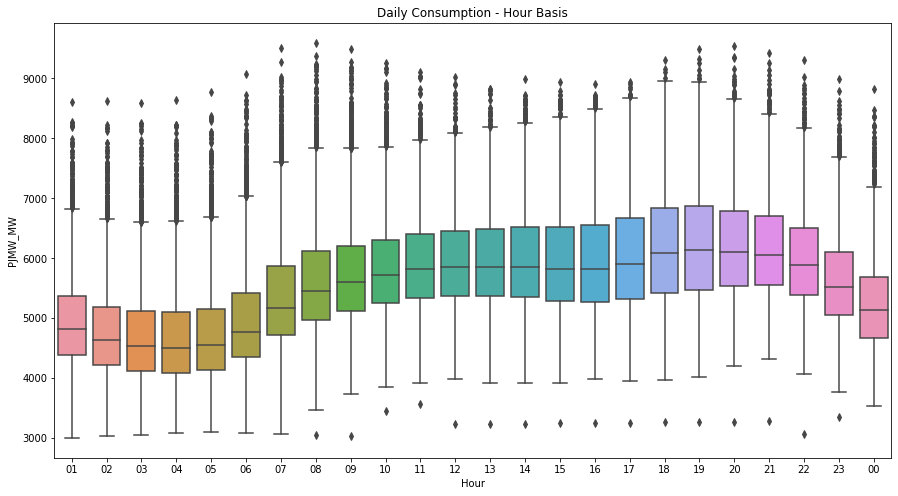

In [62]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x = pjmw2.Hour,y = pjmw2['PJMW_MW'], ax = ax)
ax.set_title('Daily Consumption - Hour Basis')

<Axes: xlabel='day', ylabel='PJMW_MW'>

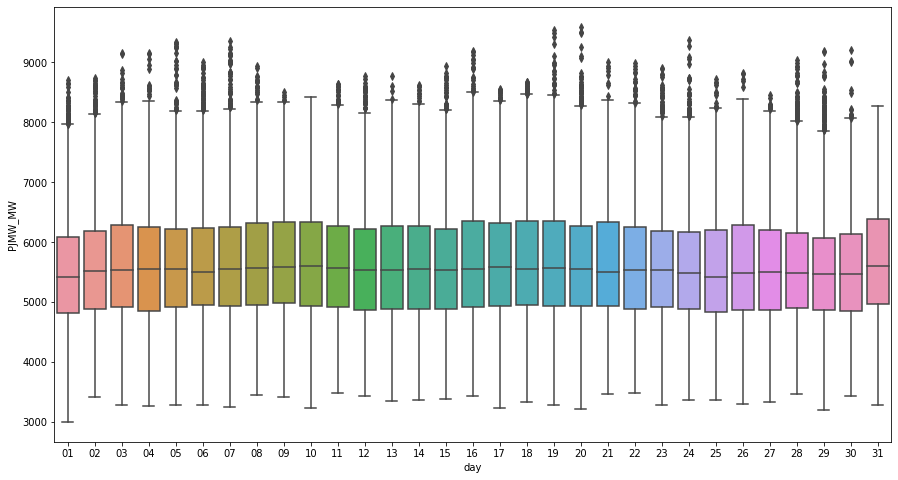

In [63]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x = pjmw2.day,y = pjmw2['PJMW_MW'],ax = ax)

<Axes: xlabel='weekday', ylabel='PJMW_MW'>

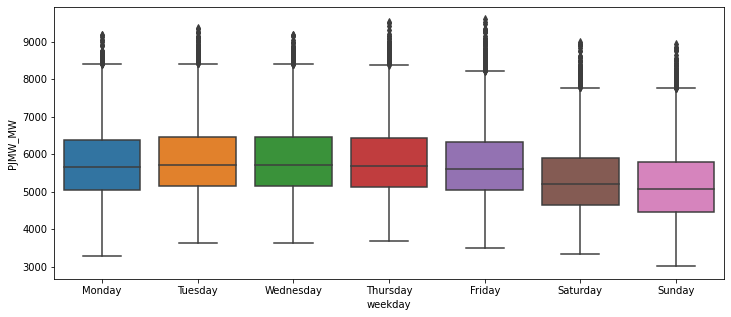

In [64]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x = pjmw2.weekday,y = pjmw2['PJMW_MW'],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ax = ax)

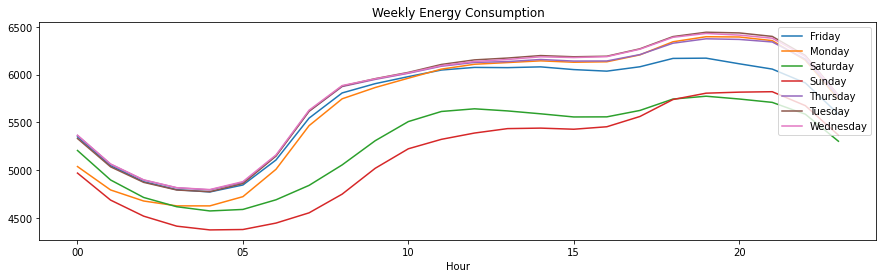

In [65]:
pjmw2.pivot_table(index=pjmw2['Hour'], columns='weekday', values='PJMW_MW',aggfunc='mean').plot(figsize=(15,4),title='Weekly Energy Consumption')
plt.legend(loc='upper right')

In [66]:
pjmw3['date'] = pjmw3.index.date

In [67]:
pjmw4=pjmw3.reset_index()

In [ ]:
import holidays
pjmw4['holidays'] = pjmw4.date.apply( lambda x: 'Holiday' if x in holidays.US() else 'Normal day' )

In [ ]:
plt.figure(figsize=(18,8))
ax1 = pjmw4[['holidays', 'PJMW_MW']].groupby( 'holidays' ).mean().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='holidays', y='PJMW_MW', data=ax1 )
ax2 = pjmw4[['year', 'holidays', 'PJMW_MW']].groupby( ['year', 'holidays'] ).mean().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='PJMW_MW', hue='holidays', data=ax2 );

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(pjmw4.PJMW_MW,period=6205)
decompose.plot()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"]= (15,8)
weekly = pjmw2.PJMW_MW.resample(rule='B').sum()
decomposition = seasonal_decompose(weekly, model='additive')
fig = decomposition.plot()
plt.show()


Ljung Box test

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(pjmw,lags=[1], return_df=True)

pvalue < 0.05 no need to do transformation 

In [ ]:
from pandas.plotting import lag_plot
plt.figure(figsize=(18,5))
lag_plot(pjmw2.PJMW_MW)
plt.show()

data set is not random. here we can see eliptical shape so it is moderately autocorrilated

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(pjmw4.PJMW_MW)
plt.show()

MEAN

In [ ]:
pjmw.plot(figsize=(15,8), legend=True, label="Data", cmap='gray')
pjmw["PJMW_MW"].rolling(150, center=False).mean().plot(legend=True, label="R Mean");
print("Mean=:", pjmw["PJMW_MW"].mean())

SD

In [ ]:
pjmw["PJMW_MW"].rolling(150).std().plot(legend=True, label="R SD");
print("S.D=:", df["PJMW_MW"].std())

CV

In [ ]:
cv = pjmw["PJMW_MW"].std()/df["PJMW_MW"].mean()
cv

hence cv is less than0.75 data has low variability process


Augmented Dickey-fuller test (ADF)

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(pjmw4.PJMW_MW , autolag= 'AIC')
print("1. ADF :" , dftest[0])
print("2. PValue :" , dftest[1])
print("3. No of lags :" , dftest[2])
print("4. No of obs :" , dftest[3])
print("5. Critical Values: ")
for key, val in dftest[4].items():
    print("\t",key, ": " , val)



as p value is less than 0.05 we can reject null hypothesis 

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(pjmw4.PJMW_MW,lags=150)
tsa_plots.plot_pacf(pjmw.PJMW_MW,lags=150)
plt.show()

In [ ]:
daily = pjmw2.resample(rule='D').mean()
daily = daily.asfreq('D')

In [ ]:
daily.head()

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(15,8),dpi=150,sharex=True)
data=daily.PJMW_MW
axes[0].plot(data[:], label = "Original series")
axes[0].plot(data[:].diff(1), label = "single differencing",color='red')
axes[0].set_title("single differencing")
plt.legend(loc='upper right', fontsize=12)
#Second differencing with 7 lags
axes[1].plot(data[:], label = "Original series")
axes[1].plot(data[:].diff(7), label = "Seasonal differencing",color='yellow')
axes[1].set_title("Seasonal differencing")
plt.legend(loc='upper right', fontsize=12)

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily, ax=axes[0,0]); axes[0,0].set_title('ACF of original series')
tsa_plots.plot_pacf(daily, ax=axes[0,1]); axes[0,1].set_title('PACF of original series')

#differencing
tsa_plots.plot_acf(daily.diff(7).dropna(), ax=axes[1,0]); axes[1,0].set_title('ACF of differenced series')
tsa_plots.plot_pacf(daily.diff(7).dropna(), ax=axes[1,1]); axes[1,1].set_title('PACF of differenced series')

plt.subplots_adjust(left=0.1,bottom=0.4,right=0.8,top=0.8,wspace=0.5,hspace=0.5)




SARIMA MODEL (Seasonal Autoregressive Integrated Moving Averages)

In [ ]:
cutoff = '2017-08-04'
daily.sort_index()

train = daily[:cutoff]
test = daily[cutoff:]

In [ ]:
train.shape,test.shape

In [ ]:
test.rename(columns={'PJMW_MW': 'TEST'}).join(train.rename(columns={'PJMW_MW': 'TRAIN'}),how='outer').plot(figsize=(15,8), title='PJM', style='.')
plt.show()

In [ ]:
#Diff 7

fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily.diff(7).dropna(), ax=axes[0,0]); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily.diff(7).dropna(), ax=axes[0,1]); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily.diff(7).diff().dropna(), ax=axes[1,0]); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily.diff(7).diff().dropna(), ax=axes[1,1]); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.4,bottom=0.4,right=0.8,top=0.8,wspace=0.5,hspace=0.5)

In [ ]:
diff7=daily.diff(7).diff().dropna()
plt.rcParams['figure.figsize'] = [10, 5]
decomposition = seasonal_decompose(diff7[-30:], model='additive')
decomposition.plot()
plt.show()

In [ ]:
model_7=sm.tsa.statespace.SARIMAX(train,order=(1,1,3),seasonal_order=(1,1,0,7))
fitted_7 = model_7.fit(disp=-1)
print(fitted_7.summary())

In [ ]:
n_steps = 365
fc7 = fitted_7.forecast(n_steps,alpha=0.05)

Evaluation

In [ ]:
fitted_series7 = pd.Series(fc7,index=test.index)
fitted_series7=fitted_series7.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(daily[-800:].index,daily[-800:].values, label='Actual', color="red", marker="o")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="yellow", marker="o")

plt.title("SARIMAX forecast - for 1 month")
plt.xlabel("Time")
plt.ylabel("Energy consumption")
plt.legend()

plt.show()

In [ ]:
def mape(forecast,actual):
    mape=round(np.mean(np.abs(forecast - actual)/np.abs(actual))*100,2)
    return mape

In [ ]:
def mae(forecast,actual):
    mae=round(np.mean(np.abs(forecast - actual)),2)
    return mae

In [ ]:
def rmse(forecast,actual):
    rmse = round(np.mean(np.abs(forecast - actual)**2)**.5,2)
    return rmse

In [ ]:
mape_7= mape(fitted_series7.values, test.values)
mae_7= mae(fitted_series7.values, test.values)
print("mape_7: ",mape_7)
print("mae_7: ",mae_7)



In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_7=sqrt((mean_squared_error(fitted_series7.values,test.values)))
rmse_7

In [ ]:
#Diff 30

fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily.diff(30).dropna(), ax=axes[0,0]); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily.diff(30).dropna(), ax=axes[0,1]); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily.diff(30).diff().dropna(), ax=axes[1,0]); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily.diff(30).diff().dropna(), ax=axes[1,1]); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.4,bottom=0.4,right=0.8,top=0.8,wspace=0.5,hspace=0.5)

In [ ]:
#Diff 70

fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily.diff(70).dropna(), ax=axes[0,0],lags=300); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily.diff(70).dropna(), ax=axes[0,1],lags=300); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily.diff(70).diff().dropna(), ax=axes[1,0],lags=300); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily.diff(70).diff().dropna(), ax=axes[1,1],lags=300); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.4,bottom=0.4,right=0.8,top=0.8,wspace=0.5,hspace=0.5)

In [ ]:
data_5yr=daily['2005-01-01':'2010-01-01']

In [ ]:
data_5yr

In [ ]:
model_70=sm.tsa.statespace.SARIMAX(data_5yr,order=(2,1,3),seasonal_order=(1,1,0,70))
fitted_70 = model_70.fit(disp=-1)
print(fitted_70.summary())

In [ ]:
n_steps = 365
fc70 = fitted_70.forecast(n_steps,alpha=0.05)

In [ ]:
fitted_series70 = pd.Series(fc70,index=test.index)
fitted_series70=fitted_series7.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(daily[-800:].index,daily[-800:].values, label='Actual', color="red", marker="o")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="yellow", marker="o")

plt.title("SARIMAX forecast - for 1 month")
plt.xlabel("Time")
plt.ylabel("Energy consumption")
plt.legend()

plt.show()

In [ ]:
mape_70= mape(fitted_series70.values, test.values)
mae_70= mae(fitted_series70.values, test.values)
print("mape_70: ",mape_70)
print("mae_70: ",mae_70)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_70=sqrt((mean_squared_error(fitted_series70.values,test.values)))
rmse_70

In [ ]:
#Diff 90
fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily.diff(90).dropna(), ax=axes[0,0],lags=200); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily.diff(90).dropna(), ax=axes[0,1],lags=200); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily.diff(90).diff().dropna(), ax=axes[1,0],lags=200); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily.diff(90).diff().dropna(), ax=axes[1,1],lags=200); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.4,bottom=0.4,right=0.8,top=0.8,wspace=0.5,hspace=0.5)



In [ ]:
model_90=sm.tsa.statespace.SARIMAX(train,order=(2,1,3),seasonal_order=(1,1,0,90))
fitted_90 = model_90.fit(low_memory=True,cov_type='approx')
print(fitted_90.summary())

In [ ]:
n_steps = 365
fc90 = fitted_90.forecast(n_steps,alpha=0.05)

In [ ]:
fitted_series90 = pd.Series(fc90,index=test.index)
fitted_series90=fitted_series90.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(daily[-800:].index,daily[-800:].values, label='Actual', color="red", marker="o")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="yellow", marker="o")

plt.title("SARIMAX forecast - for 1 month")
plt.xlabel("Time")
plt.ylabel("Energy consumption")
plt.legend()

plt.show()

In [ ]:
mape_90= mape(fitted_series90.values, test.values)
mae_90= mae(fitted_series90.values, test.values)
print("mape_90: ",mape_90)
print("mae_90: ",mae_90)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_90=sqrt((mean_squared_error(fitted_series90.values,test.values)))
rmse_90

In [ ]:
#Diff 120
fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily.diff(120).dropna(), ax=axes[0,0],lags=100); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily.diff(120).dropna(), ax=axes[0,1],lags=100); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily.diff(120).diff().dropna(), ax=axes[1,0],lags=100); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily.diff(120).diff().dropna(), ax=axes[1,1],lags=100); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.4,bottom=0.4,right=0.8,top=0.8,wspace=0.5,hspace=0.5)

In [ ]:
#Diff 140
fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily.diff(140).dropna(), ax=axes[0,0],lags=200); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily.diff(140).dropna(), ax=axes[0,1],lags=200); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily.diff(140).diff().dropna(), ax=axes[1,0],lags=200); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily.diff(140).diff().dropna(), ax=axes[1,1],lags=200); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.4,bottom=0.4,right=0.8,top=0.8,wspace=0.5,hspace=0.5)

In [ ]:
diff140=daily.diff(140).diff().dropna()
plt.rcParams['figure.figsize'] = [15, 8]
decomposition = seasonal_decompose(diff140[-30:], model='additive')
decomposition.plot()
plt.show()

In [ ]:
data_3yr=daily['2010-01-03':'2013-01-03']

In [ ]:
model_140=sm.tsa.statespace.SARIMAX(data_3yr,order=(2,1,3),seasonal_order=(1,1,0,140))
fitted_140 = model_140.fit(disp=-1)
print(fitted_140.summary())

In [ ]:
n_steps = 365
fc140 = fitted_140.forecast(n_steps,alpha=0.05)

In [ ]:
fitted_series140 = pd.Series(fc140,index=test.index)
fitted_series140=fitted_series140.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(daily[-800:].index,daily[-800:].values, label='Actual', color="red", marker="o")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="yellow", marker="o")

plt.title("SARIMAX forecast - for 1 month")
plt.xlabel("Time")
plt.ylabel("Energy consumption")
plt.legend()

plt.show()

In [ ]:
mape_140= mape(fitted_series140.values, test.values)
mae_140= mae(fitted_series140.values, test.values)
print("mape_140: ",mape_140)
print("mae_140: ",mae_140)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_140=sqrt((mean_squared_error(fitted_series140.values,test.values)))
rmse_140

In [ ]:
#Diff 365
fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily.diff(365).dropna(), ax=axes[0,0],lags=200); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily.diff(365).dropna(), ax=axes[0,1],lags=200); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily.diff(365).diff().dropna(), ax=axes[1,0],lags=200); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily.diff(365).diff().dropna(), ax=axes[1,1],lags=200); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.4,bottom=0.4,right=0.8,top=0.8,wspace=0.5,hspace=0.5)

In [ ]:
#Diff 364
fig,axes = plt.subplots(2,2,figsize=(15,8))
tsa_plots.plot_acf(daily.diff(364).dropna(), ax=axes[0,0],lags=200); axes[0,0].set_title('ACF of single diff series')
tsa_plots.plot_pacf(daily.diff(364).dropna(), ax=axes[0,1],lags=200); axes[0,1].set_title('PACF of single diff series')

#differencing
tsa_plots.plot_acf(daily.diff(364).diff().dropna(), ax=axes[1,0],lags=200); axes[1,0].set_title('ACF of double diff series')
tsa_plots.plot_pacf(daily.diff(364).diff().dropna(), ax=axes[1,1],lags=200); axes[1,1].set_title('PACF of double diff series')

plt.subplots_adjust(left=0.4,bottom=0.4,right=0.8,top=0.8,wspace=0.5,hspace=0.5)


In [ ]:
data_2yr=daily['2013-01-03':'2015-01-03']

In [ ]:
model_364=sm.tsa.statespace.SARIMAX(data_2year,order=(3,1,3),seasonal_order=(1,1,0,364))
fitted_364 = model_364.fit(low_memory=True,cov_type='approx')
print(fitted_364.summary())

In [ ]:
n_steps = 365
fc364 = fitted_364.forecast(n_steps,alpha=0.05)

In [ ]:
fitted_series364 = pd.Series(fc364,index=test.index)
fitted_series364=fitted_series364.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(daily[-800:].index,daily[-800:].values, label='Actual', color="red", marker="o")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="yellow", marker="o")

plt.title("SARIMAX forecast - for 1 month")
plt.xlabel("Time")
plt.ylabel("Energy consumption")
plt.legend()

plt.show()

In [ ]:
mape_364= mape(fitted_series364.values, test.values)
mae_364= mae(fitted_series364.values, test.values)
print("mape_364: ",mape_364)
print("mae_364: ",mae_364)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_364=sqrt((mean_squared_error(fitted_series364.values,test.values)))
rmse_364

REGRESSION MODEL

In [ ]:
df.columns = ['Energy']
df.plot(figsize=(15,8))

In [ ]:
daily = df.resample(rule='A').mean()
daily = daily.asfreq('A')

In [ ]:
daily

In [ ]:
daily1=daily.copy()


In [ ]:
daily['energy_1daybk']=daily['Energy'].shift(+1)
daily['energy_2daybk']=daily['Energy'].shift(+2)
daily['energy_3daybk']=daily['Energy'].shift(+3)
daily['energy_4daybk']=daily['Energy'].shift(+4)
daily['energy_5daybk']=daily['Energy'].shift(+5)
daily['energy_6daybk']=daily['Energy'].shift(+6)
daily['energy_7daybk']=daily['Energy'].shift(+7)

daily.head()

In [ ]:
daily=daily.dropna()
daily

In [ ]:
daily1.to_csv('dataset_daily.csv')

In [ ]:
import numpy as np
x1,x2,x3,x4,x5,x6,x7,y=daily['energy_1dayback'],daily['energy_2daybk'],daily_['energy_3daybk'],daily['energy_4daybk'],daily['energy_5daybk'],daily['energy_6daybk'],daily['energy_7daybk'],daily['Energy']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)
print(final_x)



In [ ]:
final_x

In [ ]:
y

In [ ]:
X_train,X_test,y_train,y_test=final_x[:-360],final_x[-360:],y[:-360],y[-360:]


LR,RF and XGB Model

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [ ]:
random_pred=random_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(random_pred,label='RF_Predictions')
plt.plot(y_test,label='Actual')
plt.legend(loc="upper right")
plt.show()

In [ ]:
plt.scatter(y_test,random_pred)

In [ ]:
linear_pred=linear_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(linear_pred,label='LR_Predictions')
plt.plot(y_test,label='Actual ')
plt.legend(loc="upper right")
plt.show()

In [ ]:
plt.scatter(y_test,linear_pred)

In [ ]:
resi = y_test-linear_pred

In [ ]:
sns.distplot(resi)

In [ ]:
plt.scatter(linear_pred,resi)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg_model = XGBRegressor()

In [ ]:
xg_model.fit(X_train, y_train, verbose=False)

In [ ]:
predictions = xg_model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(predictions,label='XGBoost_Predictions')
plt.plot(y_test,label='Actual')
plt.legend(loc="upper right")
plt.show()

RMSE,MAPE and MAE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_absolute_percentage_error
from math import sqrt

RMSE_RF=sqrt(mean_squared_error(random_pred,y_test))
RMSE_LR=sqrt(mean_squared_error(linear_pred,y_test))
MAE_RF = mean_absolute_error(random_pred,y_test)
MAE_LR = mean_absolute_error(linear_pred,y_test)
MAPE_RF = round((mean_absolute_percentage_error(random_pred,y_test)*100),3)
MAPE_LR = round((mean_absolute_percentage_error(linear_pred,y_test)*100),3)
MAE_XG = mean_absolute_error(y_test, predictions)
MAPE_XG= round((mean_absolute_percentage_error(y_test,predictions)*100),3)
RMSE_xg=sqrt(mean_squared_error(predictions,y_test))

In [ ]:
print('RMSE for Random Forest Model is:',RMSE_RF)
print('MAE for Random Forest Model is:',MAE_RF)
print('MAPE for Random Forest Model is:',MAPE_RF)

In [ ]:
print('RMSE for Linear Regression Model is:',RMSE_LR)
print('MAE for Linear Regression Model is:',MAE_LR)
print('MAPE for Linear Regression Model is:',MAPE_LR)

In [ ]:
print('RMSE for XG Boost Model is:',RMSE_xg)
print('MAE for XG Boos Model is:',MAE_XG)
print('MAPE for XG Boos Model is:',MAPE_XG)

forecasting accuracy

In [ ]:
#Linear Model
from sklearn.linear_model import LinearRegression
final_linear_model=LinearRegression()

final_linear_model.fit(final_x,y)

In [ ]:
forecast = np.array(daily['Energy'][:'2018-01-01'][-7:])

In [ ]:
z=forecast

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    lin_f_chk=final_linear_model.predict(ck)
    z=np.append(z,lin_f_chk)
    i=+1
future_pred_linear=z[-30:]

In [ ]:
future_pred_linear

In [ ]:
future = pd.date_range('2018-01-01','2018-02-01', freq='D')
future_pmjw = pd.DataFrame(index=future_pmjw)

In [ ]:
future_pmjw['future_eng'] = future_pred_linear.tolist()

In [ ]:
plt.figure(figsize=(15,8))
plt.title(" forecasting by Linear", fontsize=25)

plt.plot(daily1[-90:].index,daily1[-90:].values, label='Actual ', color="red", marker="o")

plt.plot(future_pjmw.index,future_pjmw.values, label='Forecast', color="blue", marker="o")
plt.axvline(future_pjmw.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.shoW()

In [ ]:
daily_last_30 = daily_data['Energy'].tail(30)

In [ ]:
MAE_check = mean_absolute_error(daily_last_30, future_pmjw)
MAPE_check= round((mean_absolute_percentage_error(daily_data_last_30,future_pjmw)*100),3)
RMSE_check=sqrt(mean_squared_error(future_pjmw,daily_last_30))

In [ ]:
print('RMSE for forecast check:',RMSE_check)
print('MAE for forecast check:',MAE_check)
print('MAPE for forecast check:',MAPE_check)

In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
final_RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [ ]:
final_RF_model.fit(final_x,y)

In [ ]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    rf_f_chk=final_RF_model.predict(ck)
    z=np.append(z,rf_f_chk)
    i=+1
future_pred_RF=z[-30:]

In [ ]:
future_pred_RF

In [ ]:
future_rf = pd.date_range('2018-01-01','2018-02-01', freq='D')
future_pjmw_rf = pd.DataFrame(index=future_rf)
future_pjmw_rf['future_energy'] = future_pred_RF.tolist()

In [ ]:
plt.figure(figsize=(14,5))
plt.title(" forecasting by RF", fontsize=25)

plt.plot(daily1[-90:].index,daily1[-90:].values, label='Actual', color="red", marker="o")

plt.plot(future_pjmw_rf.index,future_pjmw_rf.values, label='Forecast', color="yellow", marker="o")

plt.axvline(future_chk_df_rf.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [ ]:
MAE_rf_check = mean_absolute_error(daily_last_30, future_pjmw_rf)
MAPE_rf_check= round((mean_absolute_percentage_error(daily_last_30,future_pjmw_rf)*100),3)
RMSE_rf_check=sqrt(mean_squared_error(future_pjmw_rf,daily_last_30))
print('RMSE for RF forecast check:',RMSE_rf_check)
print('MAE for RF forecast check:',MAE_rf_check)
print('MAPE for RF forecast check:',MAPE_rf_check)

In [ ]:

#.XGB Model
from xgboost import XGBRegressor
final_xg_model = XGBRegressor()
final_xg_model.fit(final_x,y, verbose=False)

In [ ]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    xgb_f_chk=final_xg_model.predict(ck)
    z=np.append(z,xgb_f_chk)
    i=+1
future_pred_XGB=z[-30:]

In [ ]:
future_pred_XGB

In [ ]:
future_xgb = pd.date_range('2018-01-01','2018-02-01', freq='D')
future_pjmw_xgb = pd.DataFrame(index=future_xgb)
future_pjmw_xgb['future_energy'] = future_pred_XGB.tolist()

In [ ]:
plt.figure(figsize=(14,5))
plt.title(" forecasting by XGB", fontsize=25)

plt.plot(daily1[-90:].index,daily_data1[-90:].values, label='Actual', color="red", marker="o")

plt.plot(future_pjmw_xgb.index,future_pjmw_xgb.values, label='Forecast', color="green", marker="o")

plt.axvline(future_pjmw_xgb.index[1], color="yellow", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [ ]:
MAE_xgb_check = mean_absolute_error(daily_last_30, future_chk_df_xgb)
MAPE_xgb_check= round((mean_absolute_percentage_error(daily_last_30,future_chk_df_xgb)*100),3)
RMSE_xgb_check=sqrt(mean_squared_error(future_chk_df_xgb,daily_data_last_30))
print('RMSE for XGB forecast check:',RMSE_xgb_check)
print('MAE for XGB forecast check:',MAE_xgb_check)
print('MAPE for XGB forecast check:',MAPE_xgb_check)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
final_RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [ ]:
final_RF_model.fit(final_x,y)

In [ ]:
daily_last_7 = np.array(daily['Energy'].tail(7))
daily_last_7

In [ ]:
np.savetxt("daily_last_7.csv", daily_data_last_7, delimiter=",")

In [ ]:
z=daily_data_last_7

for i in range(0,30):
    r=z[-7:]
    r=np.array([r])
    ranf_f=final_RF_model.predict(r)
    z=np.append(z,ranf_f)
    i=+1
future_pred=z[-30:]

In [ ]:
future_pred

In [ ]:
future = pd.date_range('2018-01-01','2018-02-01', freq='D')
future_pjmw = pd.DataFrame(index=future)

In [ ]:
future_pjmw['future_energy'] = future_pred.tolist()

In [ ]:
print(future_pjmw)

In [ ]:
plt.figure(figsize=(14,5))
plt.title("forecasting by RF", fontsize=25)

plt.plot(daily1[-365:].index,daily_data1[-365:].values, label='Actual', color="red", marker="o")

plt.plot(future_pjmw.index,future_pjmw.values, label='Forecast', color="black", marker="o")
# plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(daily_data1.index[-1], color="yellow", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [ ]:
!pip install pickle-mixin

In [ ]:
import pickle

In [ ]:
filename = 'final_rf_model'
pickle.dump(final_RF_model, open(filename,'sd'))

In [ ]:
pickled_model=pickle.load(open('final_rf_model.','sb'))

In [ ]:
pk=pickled_model.predict(X_test) 
